### Dataset Reading

In [ ]:
import pandas as pd 
data = pd.read_excel('drive/My Drive/HASOC Competition Data/hasoc_2020_en_train_new.xlsx')
pd.set_option('display.max_colwidth',150)
data.head(10)

,tweet_id,text,task1,task2,ID
0,1123757263427186690,"hate wen females hit ah nigga with tht bro 😂😂, I’m tryna make u my la sweety , fuck ah bro",HOF,PRFN,hasoc_2020_en_2574
1,1123733301397733380,RT @airjunebug: When you're from the Bay but you're really a NY nigga at heart. W/ @supportcaleon https://t.co/mZ8BAYlnlf,HOF,PRFN,hasoc_2020_en_3627
2,1123734094108659712,"RT @DonaldJTrumpJr: Dear Democrats: The American people aren’t stupid, they know what spying is and no amount of gaslighting will change th…",NOT,NONE,hasoc_2020_en_3108
3,1126951188170199049,RT @SheLoveTimothy: He ain’t on drugs he just bored. I be doing the same shit when I’m bored 😂 https://t.co/tkdjSbddET,HOF,PRFN,hasoc_2020_en_3986
4,1126863510447710208,"RT @TavianJordan: Summer ‘19 I’m coming for you ! No boring shit ! Beach days, road trips, kickbacks and HOT DAYS ! I’m ready I’m ready I’m…",NOT,NONE,hasoc_2020_en_5152
5,1123631027455393792,@HermesCxbin turn that shit off,HOF,PRFN,hasoc_2020_en_4256
6,1130184942066065408,RT @spaceboykenny: i know fuck bout cel shading so have some horny instead https://t.co/ciPIEN8ZJa,HOF,PRFN,hasoc_2020_en_3821
7,1130232518056108032,Polo Ts the only other ones but that’s if you feeeling fly fly like bitch don’t touch me.,HOF,PRFN,hasoc_2020_en_5320
8,1123675222836744192,I fucking love life !!!,HOF,PRFN,hasoc_2020_en_2265
9,1130306320991707136,@Nig_BMT ‘In the newspaper ‘ I weak😂😂😂. Bro this ending has pissed me off😭,NOT,NONE,hasoc_2020_en_517


In [ ]:
data.shape

(3708, 5)

In [ ]:
print(data.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


### Making of "label" Variable

In [ ]:
label = data['task1']
label.head()

0    HOF
1    HOF
2    NOT
3    HOF
4    NOT
Name: task1, dtype: object

### Checking Dataset Balancing

HOF    1856
NOT    1852
Name: task1, dtype: int64


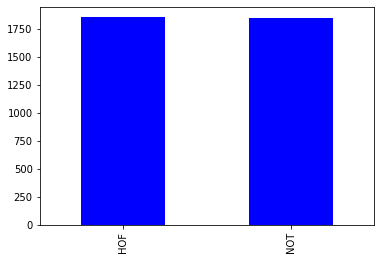

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

### Convering label into "0" or "1"

In [ ]:
import numpy as np
classes_list = ["HOF","NOT"]
label_index = data['task1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])

[0 0 1 0 1 0 0 0 0 1]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


### Making of "text" Variable

In [ ]:
text = data['text']
text.head(10)

0                                                      hate wen females hit ah nigga with tht bro 😂😂, I’m tryna make u my la sweety , fuck ah bro
1                       RT @airjunebug: When you're from the Bay but you're really a NY nigga at heart. W/ @supportcaleon https://t.co/mZ8BAYlnlf
2    RT @DonaldJTrumpJr: Dear Democrats: The American people aren’t stupid, they know what spying is and no amount of gaslighting will change th…
3                          RT @SheLoveTimothy: He ain’t on drugs he just bored. I be doing the same shit when I’m bored 😂 https://t.co/tkdjSbddET
4    RT @TavianJordan: Summer ‘19 I’m coming for you ! No boring shit ! Beach days, road trips, kickbacks and HOT DAYS ! I’m ready I’m ready I’m…
5                                                                                                                 @HermesCxbin turn that shit off
6                                              RT @spaceboykenny: i know fuck bout cel shading so have some horny instead ht

### Dataset Pre-processing

In [ ]:
import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"I'm", "I am ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"shouldn't", "should not ", text)
    text = re.sub(r"shouldn", "should not ", text)
    text = re.sub(r"didn", "did not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"rt", " ", text)

  
    return text

In [ ]:
clean_text = text.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                                           hate wen females hit ah nigga with tht bro i m tryna make u my la sweety fuck ah bro
1                                                   airjunebug : when you are from the bay but you are really a ny nigga at hea  w suppo caleon 
2      donaldjtrumpjr : dear democrats : the american people aren t stupid they know what spying is and no amount of gaslighting will change th 
3                                                      shelovetimothy : he ain t on drugs he just bored i be doing the same shit when i m bored 
4         tavianjordan : summer 19 i m coming for you ! no boring shit ! beach days road trips kickbacks and hot days ! i m ready i m ready i m 
5                                                                                                                 hermescxbin turn that shit off
6                                                                       spaceboykenny : i know fuck bout cel shading so have some 

### Removing stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('english')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                                     hate wen females hit ah nigga tht bro tryna make u la sweety fuck ah bro
1                                                        airjunebug : bay really ny nigga hea  w suppo caleon 
2           donaldjtrumpjr : dear democrats : american people stupid know spying amount gaslighting change th 
3                                                                     shelovetimothy : drugs bored shit bored 
4      tavianjordan : summer 19 coming ! boring shit ! beach days road trips kickbacks hot days ! ready ready 
5                                                                                        hermescxbin turn shit
6                                                    spaceboykenny : know fuck bout cel shading horny instead 
7                                                              polo ts ones feeeling fly fly like bitch touch 
8                                                                                     fucking love life ! ! ! 
9

### Stemming

In [ ]:
# Stemming
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head(10))

0                                     hate wen females hit ah nigga tht bro tryna make u la sweety fuck ah bro
1                                                        airjunebug : bay really ny nigga hea  w suppo caleon 
2           donaldjtrumpjr : dear democrats : american people stupid know spying amount gaslighting change th 
3                                                                     shelovetimothy : drugs bored shit bored 
4      tavianjordan : summer 19 coming ! boring shit ! beach days road trips kickbacks hot days ! ready ready 
5                                                                                        hermescxbin turn shit
6                                                    spaceboykenny : know fuck bout cel shading horny instead 
7                                                              polo ts ones feeeling fly fly like bitch touch 
8                                                                                     fucking love life ! ! ! 
9

### Tokenization using "keras"

In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

### Making Vocab for words

In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

11082


In [ ]:
l = tok_all.word_index
print(l)

{'fuck': 1, 'shit': 2, 'fucking': 3, 'like': 4, 'get': 5, 'ass': 6, 'go': 7, 'people': 8, 'need': 9, 'know': 10, 'think': 11, 'want': 12, 'one': 13, 'bitch': 14, 'never': 15, 'ever': 16, 'going': 17, 'damn': 18, 'would': 19, 'got': 20, 'tell': 21, 'u': 22, 'realdonaldtrump': 23, 'president': 24, 'trump': 25, 'stupid': 26, 'said': 27, 'look': 28, 'see': 29, 'really': 30, 'bts': 31, 'amp': 32, 'say': 33, 'getting': 34, 'good': 35, 'sick': 36, 'even': 37, 'away': 38, 'still': 39, 'come': 40, 'stop': 41, 'two': 42, 'work': 43, 'today': 44, 'big': 45, 'better': 46, '2': 47, 'little': 48, 'sta': 49, 'gonna': 50, '2019': 51, 'love': 52, 'help': 53, 'well': 54, 'everything': 55, 'years': 56, 'man': 57, 'lol': 58, 'way': 59, 'make': 60, 'thought': 61, 'time': 62, 'give': 63, '3': 64, 'could': 65, 'keep': 66, 'america': 67, 'right': 68, 'h': 69, '1': 70, 'hate': 71, 'found': 72, 'probably': 73, 'white': 74, 'w': 75, 'life': 76, 'oh': 77, 'always': 78, 'day': 79, 'someone': 80, 'show': 81, 'im': 

### encoding or sequencing

In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[1])
print(encoded_clean_text_stem[1])

  airjunebug : bay really ny nigga hea  w suppo caleon 
[3164, 3165, 30, 1367, 114, 192, 75, 202, 3166]


### Pre-padding

In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Test Data Pre-processing

# Data test Reading

In [ ]:
data_t = pd.read_csv('drive/My Drive/HASOC Competition Data/english_test_1509.csv')
pd.set_option('display.max_colwidth',150)
data_t.head(10)

,tweet_id,text,task1,task2,ID
0,1130081762154090497,RT @delmiyaa: Samini resetting the show and moving things along as if nothing happened is all you need to know about his greatness.,NOT,NONE,hasoc_2020_en_2713
1,1130048316807491584,@Swxnsea how do you know that he’s left?,HOF,NONE,hasoc_2020_en_3874
2,1123657766143504386,"Tried to get Divock Origi on a free seeing as he was at the club on loan. He accepted the offer, but for no actual… https://t.co/3WrM7NHjwV",NOT,NONE,hasoc_2020_en_281
3,1126782963042013186,RT @nutclusteruwu: that....is yalls stupid white ass reactions meeting tom holland in disneyland? are you fucking kidding me i would have d…,HOF,PRFN,hasoc_2020_en_2026
4,1130159113529434113,&amp; IT DID. But a bitch got big girls things to do now 😇,HOF,PRFN,hasoc_2020_en_4023
5,1126820921501679617,I need hash browns,NOT,NONE,hasoc_2020_en_742
6,1123805971883732993,@TheFrankComin fuck her like it’s the end of the world.,HOF,OFFN,hasoc_2020_en_1747
7,1127041965499895809,RT @stoned2thabones: or she’s high as shit https://t.co/jx6pOmWetM,HOF,PRFN,hasoc_2020_en_3102
8,1123772564269084673,RT @NotHoopOverhoes: You’re not losing because you’re a nice guy you’re losing because you’re lame lmao,HOF,PRFN,hasoc_2020_en_1449
9,1123693589693968385,"@sammyyyk12 Ummmmm excuse me, you too bitch 🎓🎓🎓⚡️⚡️",HOF,OFFN,hasoc_2020_en_3086


In [ ]:
data_t.shape

(814, 5)

In [ ]:
print(data_t.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


# Making of "label" Variable

In [ ]:
label_t = data_t['task1']
label_t.head()

0    NOT
1    HOF
2    NOT
3    HOF
4    HOF
Name: task1, dtype: object

# Checking Dataset Balancing

HOF    423
NOT    391
Name: task1, dtype: int64


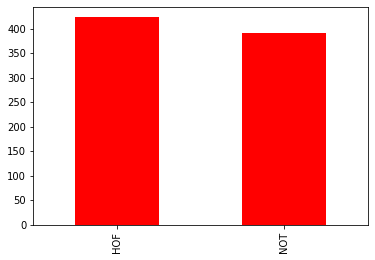

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

# Convering label into "0" or "1"

In [ ]:
import numpy as np
classes_list_t = ["HOF","NOT"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])

[1 0 1 0 0 1 0 0 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)

In [ ]:
print(label_twoDimension_t[:10])

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Making of "text" Variable

In [ ]:
text_t = data_t['text']
text_t.head(10)

0             RT @delmiyaa: Samini resetting the show and moving things along as if nothing happened is all you need to know about his greatness.
1                                                                                                        @Swxnsea how do you know that he’s left?
2     Tried to get Divock Origi on a free seeing as he was at the club on loan. He accepted the offer, but for no actual… https://t.co/3WrM7NHjwV
3    RT @nutclusteruwu: that....is yalls stupid white ass reactions meeting tom holland in disneyland? are you fucking kidding me i would have d…
4                                                                                      &amp; IT DID. But a bitch got big girls things to do now 😇
5                                                                                                                              I need hash browns
6                                                                                         @TheFrankComin fuck her like it’s 

# **Dataset Pre-processing**
1. Remove unwanted words
2. Stopwords removal
3. Stemming
4. Tokenization
5. Encoding or Sequencing
6. Pre-padding

### 1. Removing Unwanted Words

In [ ]:
import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"I'm", "I am ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"shouldn't", "should not ", text)
    text = re.sub(r"shouldn", "should not ", text)
    text = re.sub(r"didn", "did not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"rt", " ", text)

  
    return text

In [ ]:
clean_text_t = text_t.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0           delmiyaa : samini resetting the show and moving things along as if nothing happened is all you need to know about his greatness 
1                                                                                                    swxnsea how do you know that he s left 
2                          tried to get divock origi on a free seeing as he was at the club on loan he accepted the offer but for no actual 
3      nutclusteruwu : that is yalls stupid white ass reactions meeting tom holland in disneyland are you fucking kidding me i would have d 
4                                                                                    amp; it did but a bitch got big girls things to do now 
5                                                                                                                         i need hash browns
6                                                                                     thefrankcomin fuck her like it s the end of the world 
7            

### 2. Removing Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('english')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                  delmiyaa : samini resetting show moving things along nothing happened need know greatness 
1                                                                                          swxnsea know left 
2                                         tried get divock origi free seeing club loan accepted offer actual 
3      nutclusteruwu : yalls stupid white ass reactions meeting tom holland disneyland fucking kidding would 
4                                                                            amp; bitch got big girls things 
5                                                                                            need hash browns
6                                                                          thefrankcomin fuck like end world 
7                                                                                stoned2thabones : high shit 
8                                                          nothoopoverhoes : losing nice guy losing lame lmao
9         

### 3. Stemming

In [ ]:
# Stemming
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                  delmiyaa : samini resetting show moving things along nothing happened need know greatness 
1                                                                                          swxnsea know left 
2                                         tried get divock origi free seeing club loan accepted offer actual 
3      nutclusteruwu : yalls stupid white ass reactions meeting tom holland disneyland fucking kidding would 
4                                                                            amp; bitch got big girls things 
5                                                                                            need hash browns
6                                                                          thefrankcomin fuck like end world 
7                                                                                stoned2thabones : high shit 
8                                                          nothoopoverhoes : losing nice guy losing lame lmao
9         

### 4. Tokenization

In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)

In [ ]:
vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)

3641


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'fuck': 1, 'shit': 2, 'get': 3, 'need': 4, 'fucking': 5, 'go': 6, 'like': 7, 'ass': 8, 'want': 9, 'people': 10, 'know': 11, 'bitch': 12, 'never': 13, 'think': 14, 'ever': 15, 'today': 16, 'bts': 17, 'see': 18, 'would': 19, 'president': 20, 'got': 21, 'damn': 22, 'going': 23, 'u': 24, 'good': 25, 'look': 26, 'getting': 27, 'man': 28, 'tell': 29, 'away': 30, 'one': 31, 'big': 32, 'stop': 33, 'stupid': 34, 'time': 35, 'sick': 36, '2': 37, 'trump': 38, 'even': 39, 'everything': 40, 'really': 41, 'oh': 42, 'b': 43, 'realdonaldtrump': 44, 'right': 45, 'better': 46, 'work': 47, 'gonna': 48, 'come': 49, 'show': 50, 'said': 51, 'die': 52, 'say': 53, 'sta': 54, 'make': 55, 'could': 56, 'little': 57, '19': 58, 'twt': 59, 'old': 60, 'give': 61, 'rest': 62, 'still': 63, '3': 64, '1': 65, 'let': 66, 'amp': 67, 'pa': 68, 'someone': 69, 'morning': 70, 'found': 71, 'probably': 72, 'hea': 73, 'bbmas': 74, 'ready': 75, 'fine': 76, 'thought': 77, 'love': 78, 'hate': 79, 'put': 80, 'two': 81, 'things': 82

### 5. Encoding or Sequencing

In [ ]:
encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])

  delmiyaa : samini resetting show moving things along nothing happened need know greatness 
[81, 1603, 207, 545, 216, 789, 9, 10]


### 6. Pre-padding

In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')

# GloVe Embedding

In [ ]:
# GloVe Embedding link - https://nlp.stanford.edu/projects/glove/

import os
import numpy as np

embeddings_index = {}
f = open('drive/My Drive/HASOC Competition Data/Copy of glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

# **CNN Model**

In [ ]:
from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq

In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)

In [ ]:
CNN2_model=Sequential([Embedding_Layer,
                        Conv1D(128,5,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(64,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dense(2,activation="sigmoid")
                       
                       ])

In [ ]:
CNN2_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          3324900   
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 128)          192128    
_________________________________________________________________
dropout (Dropout)            (None, 100, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 64)            24640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 64)            0

In [ ]:
from keras.optimizers import Adam
CNN2_model.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])


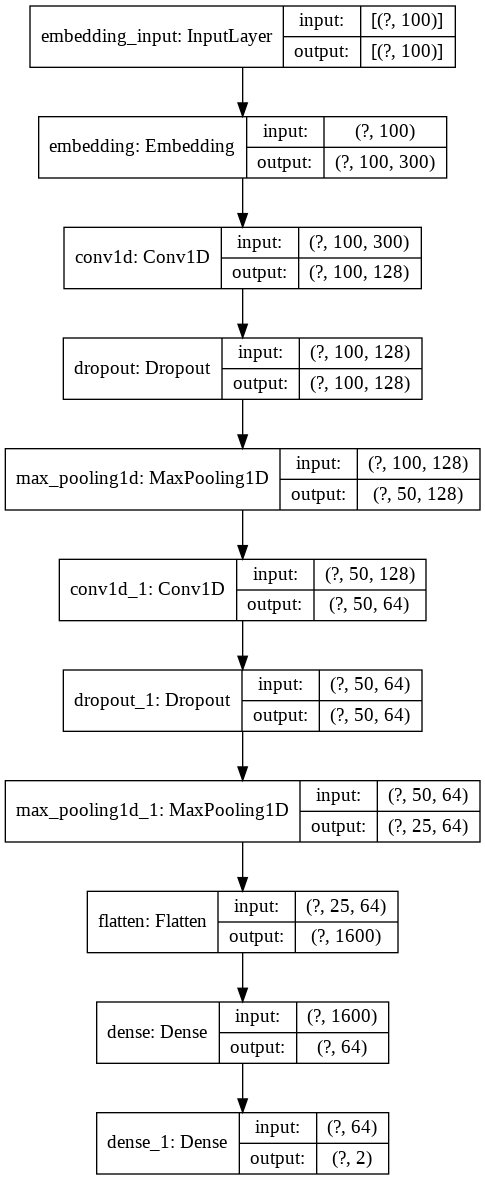

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN2_model, to_file='CNN2_model.png', show_shapes=True, show_layer_names=True)

# Dataset Splitting

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)

### **Model Fitting or Training**

In [ ]:
hist = CNN2_model.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
116/116 [==============================] - 1s 10ms/step - loss: 0.6877 - accuracy: 0.5612
Epoch 2/200
116/116 [==============================] - 1s 9ms/step - loss: 0.6563 - accuracy: 0.6874
Epoch 3/200
116/116 [==============================] - 1s 9ms/step - loss: 0.5849 - accuracy: 0.7503
Epoch 4/200
116/116 [==============================] - 1s 9ms/step - loss: 0.4836 - accuracy: 0.8026
Epoch 5/200
116/116 [==============================] - 1s 9ms/step - loss: 0.4161 - accuracy: 0.8328
Epoch 6/200
116/116 [==============================] - 1s 9ms/step - loss: 0.3766 - accuracy: 0.8501
Epoch 7/200
116/116 [==============================] - 1s 9ms/step - loss: 0.3450 - accuracy: 0.8646
Epoch 8/200
116/116 [==============================] - 1s 8ms/step - loss: 0.3262 - accuracy: 0.8708
Epoch 9/200
116/116 [==============================] - 1s 9ms/step - loss: 0.3073 - accuracy: 0.8757
Epoch 10/200
116/116 [==============================] - 1s 9ms/step - loss: 0.2940 - accur

# log loss

In [ ]:
CNN2_model_predictions = CNN2_model.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN2_model_predictions)
log_loss_test

0.7712965646456243

# Classification Report

In [ ]:
predictions = np.zeros_like(CNN2_model_predictions)
predictions[np.arange(len(CNN2_model_predictions)), CNN2_model_predictions.argmax(1)] = 1

In [ ]:
predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)

     task1
0        1
1        1
2        1
3        0
4        0
..     ...
809      1
810      1
811      1
812      1
813      1

[814 rows x 1 columns]


In [ ]:
df.to_csv("submission_EN_A.csv", index=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))

              precision    recall  f1-score   support

           0       0.91      0.80      0.86       423
           1       0.81      0.92      0.86       391

   micro avg       0.86      0.86      0.86       814
   macro avg       0.86      0.86      0.86       814
weighted avg       0.87      0.86      0.86       814
 samples avg       0.86      0.86      0.86       814



# Epoch v/s Loss Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

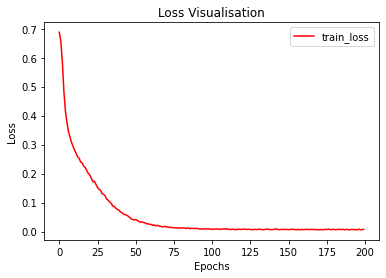

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN2_HASOC_Eng_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN2_HASOC_Eng_lossPlot.pdf') 

# Epoch v/s Accuracy Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

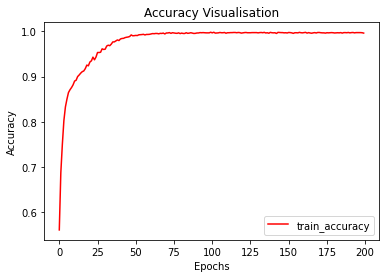

In [ ]:
plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN2_HASOC_Eng_accuracyPlot.pdf',dpi=1000)
files.download('CNN2_HASOC_Eng_accuracyPlot.pdf') 

# Area under Curve-ROC

In [ ]:
pred_train = CNN2_model.predict(padded_clean_text_stem)
pred_test = CNN2_model.predict(padded_clean_text_t_stem)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN2_HASOC_Eng_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN2_HASOC_Eng_Area_RocPlot.pdf')

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

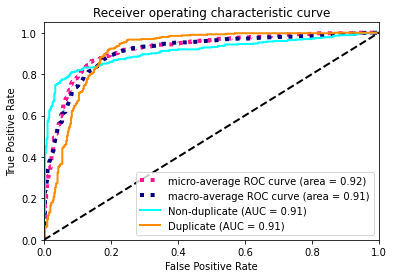

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)